**Importing Data**

In [1]:
import pandas as pd

In [45]:
titanic_url = "D:\My Work\Otherthan Syllabus\Data Science\Projects\Titanic Dataset\TitanicData.csv"

In [46]:
df_titanic = pd.read_csv(titanic_url)

In [47]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
df_titanic.shape

(891, 12)

**Data Preprocessing**

In [49]:
df_titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [50]:
df_titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
501,0,3,female,21.0,0,0,7.7500,Q
34,0,1,male,28.0,1,0,82.1708,C
689,1,1,female,15.0,0,1,211.3375,S
20,0,2,male,35.0,0,0,26.0000,S
546,1,2,female,19.0,1,0,26.0000,S


**Data Wrangling**

In [51]:
df_titanic[df_titanic.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [52]:
df_titanic = df_titanic.dropna()

In [53]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [54]:
df_titanic[df_titanic.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [55]:
df_titanic.shape

(712, 8)

**Checking for a description of the dataset**

In [56]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


> So, only 40% of passengers have been survived the titanic accident

In [57]:
pd.crosstab(df_titanic['Sex'],df_titanic['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [58]:
pd.crosstab(df_titanic['Pclass'],df_titanic['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [59]:
titanic_data_corr = df_titanic.corr()

In [60]:
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [61]:
import seaborn as sns

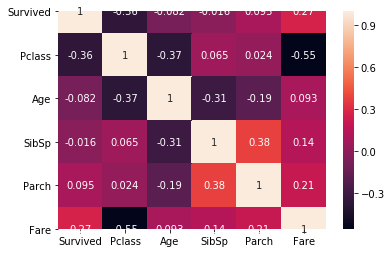

In [62]:
sns.heatmap(titanic_data_corr,annot=True)

In [63]:
from sklearn import preprocessing

In [64]:
label_encoder = preprocessing.LabelEncoder()
df_titanic['Sex'] = label_encoder.fit_transform(df_titanic['Sex'].astype(str))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,Q
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
889,1,1,1,26.0,0,0,30.0000,C


In [66]:
label_encoder.classes_

array(['female', 'male'], dtype=object)

> 1 - Male and 0 - Female

*- One shot encoding we for cateogarical data and Label encoding we use for ordinal data*

In [67]:
df_titanic = pd.get_dummies(df_titanic, columns=['Embarked'])

In [68]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,0,1,0
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [71]:
df_titanic = df_titanic.sample(frac=1).reset_index(drop=True)

In [72]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,51.0,0,1,61.3792,1,0,0
1,0,3,1,18.0,1,0,6.4958,0,0,1
2,0,3,1,25.0,1,0,7.7750,0,0,1
3,1,2,0,29.0,0,0,10.5000,0,0,1
4,1,3,0,33.0,3,0,15.8500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,24.0,2,0,24.1500,0,0,1
708,0,3,1,16.0,0,0,7.7750,0,0,1
709,0,3,0,9.0,4,2,31.2750,0,0,1
710,1,2,0,36.0,1,0,26.0000,0,0,1


In [73]:
df_titanic.to_csv(r"D:\My Work\Otherthan Syllabus\Data Science\Projects\Titanic Dataset\Preprocessed_Titanic_Data.csv", index=False)

**Model creation**

In [2]:
processed_titanic_data = r"D:\My Work\Otherthan Syllabus\Data Science\Projects\Titanic Dataset\Preprocessed_Titanic_Data.csv"

In [3]:
processed_df_titanic = pd.read_csv(processed_titanic_data)

In [4]:
processed_df_titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
139,0,1,1,56.0,0,0,30.6958,1,0,0
466,0,3,1,20.0,0,0,9.8458,0,0,1
493,0,3,0,39.0,0,5,29.1250,0,1,0
573,0,3,1,16.0,0,0,9.2167,0,0,1
569,1,1,1,27.0,0,0,30.5000,0,0,1


In [5]:
processed_df_titanic.shape

(712, 10)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
y = processed_df_titanic['Survived']
x = processed_df_titanic.drop('Survived',axis=1)

In [8]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,1,51.0,0,1,61.3792,1,0,0
1,3,1,18.0,1,0,6.4958,0,0,1
2,3,1,25.0,1,0,7.7750,0,0,1
3,2,0,29.0,0,0,10.5000,0,0,1
4,3,0,33.0,3,0,15.8500,0,0,1
...,...,...,...,...,...,...,...,...,...
707,3,1,24.0,2,0,24.1500,0,0,1
708,3,1,16.0,0,0,7.7750,0,0,1
709,3,0,9.0,4,2,31.2750,0,0,1
710,2,0,36.0,1,0,26.0000,0,0,1


In [9]:
y

0      0
1      0
2      0
3      1
4      1
      ..
707    0
708    0
709    0
710    1
711    0
Name: Survived, Length: 712, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((569, 9), (569,), (143, 9), (143,))

**Logistic Regression model**

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logistic_r_model = LogisticRegression().fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
y_pred = logistic_r_model.predict(x_test)

In [20]:
results_df = pd.DataFrame({'actual':y_test,
                          'predicted':y_pred})

In [23]:
results_df.sample(5)

,actual,predicted
89,1,1
538,0,0
650,0,0
302,1,0
51,0,0


**Confusion matrix**

In [24]:
results_crosstab = pd.crosstab(results_df['predicted'],results_df['actual'])
results_crosstab

actual,0,1
predicted,,
0,82,13
1,15,33


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [26]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("Accuracy is: ",accuracy)
print("Precision is: ",precision)
print("Recall is: ",recall)

Accuracy is:  0.8041958041958042
Precision is:  0.6875
Recall is:  0.717391304347826


**Manually calculating accuracy, precision and recall**

In [27]:
TP = results_crosstab[1][1]
TN = results_crosstab[0][0]
FP = results_crosstab[0][1]
FN = results_crosstab[1][0]
TP, TN, FP, FN

(33, 82, 15, 13)

In [28]:
accuracy_score_verified = (TP+TN)/(TP+TN+FP+FN)
accuracy_score_verified

0.8041958041958042

In [29]:
precision_score_verified = (TP)/(TP+FP)
precision_score_verified

0.6875

In [30]:
recall_score_verified = (TP)/(TP+FN)
recall_score_verified

0.717391304347826

**SVM model**

In [35]:
from sklearn.svm import LinearSVC

> LinearSVC = SVC(kernel='linear')

In [36]:
svm_model = LinearSVC(C=1.0,dual=False).fit(x_train, y_train)

In [37]:
pred = svm_model.predict(x_test)

In [38]:
svm_results_df = pd.DataFrame({'actual':y_test,
                              'predicted':pred})

In [39]:
svm_results_df.sample(5)

,actual,predicted
578,0,0
299,0,1
591,0,0
690,0,0
411,0,0


In [40]:
svm_cross_tab = pd.crosstab(svm_results_df['predicted'],svm_results_df['actual'])
svm_cross_tab

actual,0,1
predicted,,
0,73,16
1,10,44


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [42]:
accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)

print("Accuracy is: ",accuracy)
print("Precision is: ",precision)
print("Recall is: ",recall)

Accuracy is:  0.8181818181818182
Precision is:  0.8148148148148148
Recall is:  0.7333333333333333


**Nearest-Neighbor**

> Radius Nearest-Neighbor

In [43]:
import math

In [44]:
value = round(math.sqrt(processed_df_titanic.shape[0]))

In [45]:
from sklearn import neighbors

In [46]:
raidus_neighbor_model = neighbors.RadiusNeighborsClassifier(radius=value)

In [47]:
raidus_neighbor_model.fit(x_train, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=27, weights='uniform')

In [48]:
radius_nn_predict = raidus_neighbor_model.predict(x_test)

In [49]:
radius_nn_df = pd.DataFrame({'actual':y_test,
                            'predicted':radius_nn_predict})

In [50]:
radius_nn_df.sample(5)

,actual,predicted
155,1,0
560,0,0
590,0,0
679,0,0
469,1,0


In [51]:
radius_nn_cross_tab = pd.crosstab(radius_nn_df['predicted'],radius_nn_df['actual'])
radius_nn_cross_tab

actual,0,1
predicted,,
0,75,45
1,8,15


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [53]:
accuracy = accuracy_score(y_test,radius_nn_predict)
precision = precision_score(y_test,radius_nn_predict)
recall = recall_score(y_test,radius_nn_predict)

print("Accuracy is: ",accuracy)
print("Precision is: ",precision)
print("Recall is: ",recall)

Accuracy is:  0.6293706293706294
Precision is:  0.6521739130434783
Recall is:  0.25


> K nearest neighbour

In [77]:
k_neighbor_model = neighbors.KNeighborsClassifier()

In [78]:
k_neighbor_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
k_nn_predict = k_neighbor_model.predict(x_test)

In [80]:
k_nn_results_df = pd.DataFrame({'actual':y_test,
                               'predicted':k_nn_predict})

In [81]:
k_nn_results_df.sample(5)

,actual,predicted
386,1,1
264,0,0
524,1,1
372,1,0
104,0,0


In [82]:
k_nn_cross_tab = pd.crosstab(k_nn_results_df['predicted'], k_nn_results_df['actual'])
k_nn_cross_tab

actual,0,1
predicted,,
0,70,24
1,13,36


In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [84]:
accuracy = accuracy_score(y_test, k_nn_predict)
precision = precision_score(y_test, k_nn_predict)
recall = recall_score(y_test, k_nn_predict)

print("Accuracy is: ",accuracy)
print("Precision is: ",precision)
print("Recall is: ",recall)

Accuracy is:  0.7412587412587412
Precision is:  0.7346938775510204
Recall is:  0.6


**Decision Tree**

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
decision_tree_model = DecisionTreeClassifier()

In [14]:
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
decision_tree_predict = decision_tree_model.predict(x_test)

In [19]:
decision_tree_df = pd.DataFrame({'actual':y_test
                               ,'predicted':decision_tree_predict})
decision_tree_df.sample(5)

,actual,predicted
271,1,1
222,1,0
473,0,0
190,0,0
631,0,0


In [20]:
decision_tree_crosstab = pd.crosstab(decision_tree_df['predicted'],decision_tree_df['actual'])
decision_tree_crosstab

actual,0,1
predicted,,
0,73,19
1,12,39


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [22]:
accuracy = accuracy_score(y_test,decision_tree_predict)
precision = precision_score(y_test,decision_tree_predict)
recall = recall_score(y_test,decision_tree_predict)

print("Accuracy is: ",accuracy)
print("Precision is: ",precision)
print("Recall is: ",recall)

Accuracy is:  0.7832167832167832
Precision is:  0.7647058823529411
Recall is:  0.6724137931034483


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, decision_tree_predict))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        85
           1       0.76      0.67      0.72        58

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



**Naive Bayes**

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
naive_bayes_model = GaussianNB()

In [37]:
naive_bayes_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
naive_bayes_predict = naive_bayes_model.predict(x_test)

In [39]:
naive_bayes_df = pd.DataFrame({'actual':y_test,
                              'predicted':naive_bayes_predict})
naive_bayes_df.sample(5)

,actual,predicted
466,0,0
162,1,1
302,1,0
219,0,1
558,0,0


In [40]:
naive_bayes_crosstab = pd.crosstab(naive_bayes_df['predicted'],naive_bayes_df['actual'])
naive_bayes_crosstab

actual,0,1
predicted,,
0,70,19
1,15,39


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy = accuracy_score(y_test,naive_bayes_predict)
precision = precision_score(y_test,naive_bayes_predict)
recall = recall_score(y_test,naive_bayes_predict)

print("Accuracy is: ",accuracy)
print("Precision is: ",precision)
print("Recall is: ",recall)

Accuracy is:  0.7622377622377622
Precision is:  0.7222222222222222
Recall is:  0.6724137931034483


In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,naive_bayes_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        85
           1       0.72      0.67      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

